# Exploratory Data Analysis

In [156]:
from models import naive_bayes, logistic, random_forest

In [155]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
#import data 
data = pd.read_csv('clean_data.csv.txt',index_col = 0)

In [121]:
data.head()

,clean text,tweetid,is_retweet,is_quoted,date_time,retweets,favorites,followers,verified,location,exclamation_mark_count,question_mark_count,imputed,sentiment
2,aaaaaand delet glob warm rain tweet cas miss s...,794050846807982080,1,0,2016-11-03 05:37:29.000,47,79,20106,1,NYC,0,0,False,-1
3,aaaaand go trump admin start remov clim chang ...,828858786286796800,1,0,2017-02-07 07:07:01.000,2,3,5164,0,n,0,0,True,1
4,aaaand elimin ref glob warm wisconsin,814547316258512896,1,0,2016-12-29 18:58:31.000,2,3,5164,0,n,0,0,True,1
5,aaaand ep remov clim chang pag stil check ever...,858153629638959106,1,0,2017-04-29 02:59:03.000,760,637,428254,0,NaN,0,0,False,1
6,ab act clim chang cal show success vis amp pract,890334462004699136,1,0,2017-07-26 22:14:12.000,38,76,19398,1,"Lakewood, CA",0,0,False,1


In [122]:
data.tail()

,clean text,tweetid,is_retweet,is_quoted,date_time,retweets,favorites,followers,verified,location,exclamation_mark_count,question_mark_count,imputed,sentiment
36415,zink said appear interest continu agend sci ef...,953664226215604226,1,0,2018-01-17 16:24:04.000,16,27,274141,1,Connecticut,0,0,False,1
36417,zoe tel ok wel august nev end caus glob warm n...,799128138080845824,0,0,2016-11-17 05:52:49.000,0,2,196,0,"Salt Lake City, UT",1,0,False,0
36418,zomb crim amp nee eng big issu today clim chan...,850128738343768065,1,0,2017-04-06 23:31:00.000,5,4,3620,0,"London, England",0,0,False,1
36419,zomby heal car bil die dc bipart maj mov clim ...,887160359437582338,0,0,2017-07-18 04:01:26.000,1,0,119,0,"Bay Area, California",0,0,False,0
36420,zuckerburg play hand trump reckon hes piss cli...,908948420139913221,0,0,2017-09-16 06:59:25.000,0,0,56,0,NaN,0,0,False,1


### Data Visualizations

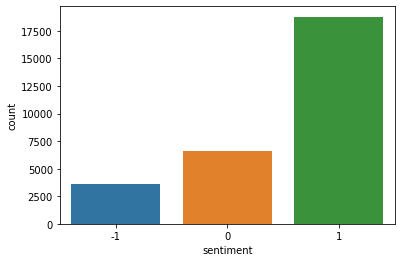

In [123]:
#sentiment distribution
#-1 = anti, 0 = neutral, 1 = pro 
sns.countplot(data["sentiment"])
plt.show()

In [164]:
len(data[data["sentiment"] == 1])/len(data)

0.6481264232972189

A null model would always predict sentiment = 1. This model would predict the class correctly approximatley 64% of the time. To assess the models we fit, we will compare them to this baseline.

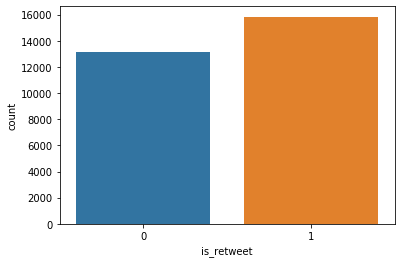

In [124]:
#is retweet distribution
sns.countplot(data["is_retweet"])
plt.show()

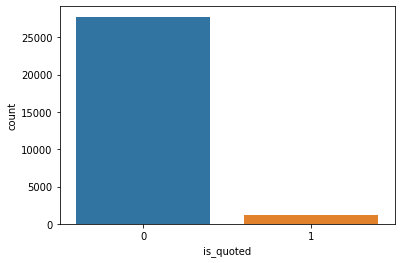

In [125]:
#is quoted distribution
sns.countplot(data["is_quoted"])
plt.show()

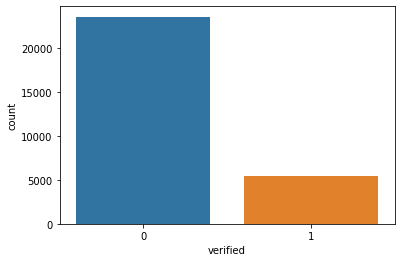

In [126]:
#is verified distribution
sns.countplot(data["verified"])
plt.show()

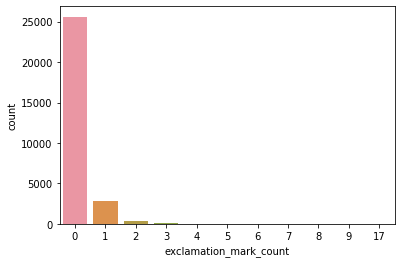

In [127]:
#exclamation mark distribution
sns.countplot(data["exclamation_mark_count"])
plt.show()

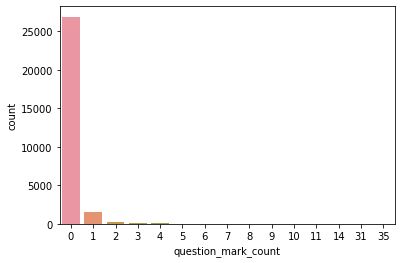

In [128]:
#question mark distribution
sns.countplot(data["question_mark_count"])
plt.show()

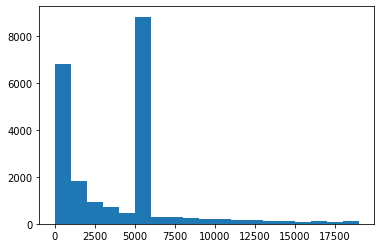

In [129]:
#follower histogram
plt.hist(data["followers"], bins = np.arange(0,20000,1000))
plt.show()

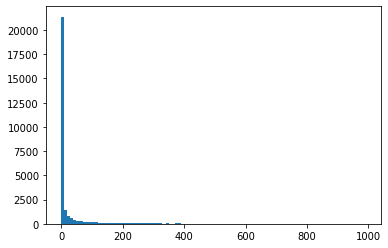

In [130]:
#retweets distribution
plt.hist(data["retweets"], bins = np.arange(0, 1000,10))
plt.show()

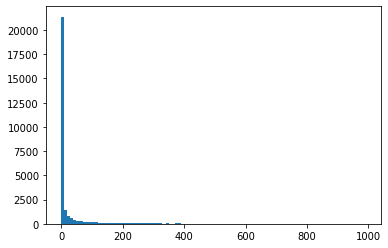

In [131]:
#favorites distribution
plt.hist(data["retweets"], bins = np.arange(0, 1000,10))
plt.show()

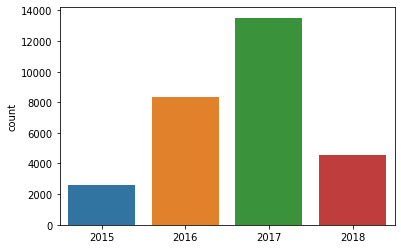

In [132]:
#years distribution 
years = [(int(x[0:4])) for x in data["date_time"]]
sns.countplot(years)
plt.show()

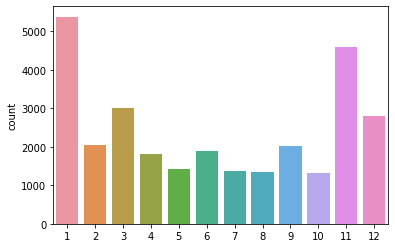

In [133]:
#month distribution
months = [(int(x[5:7])) for x in data["date_time"]]
sns.countplot(months)
plt.show()

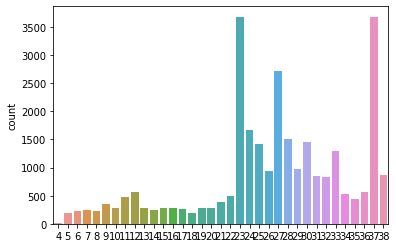

In [134]:
#distribution over time
year_map = {2015: 0, 2016:1, 2017:2, 2018:3}
dates = []
for i in range(len(years)):
    dates += [year_map[years[i]]*12 + months[i]]
    
sns.countplot(dates)
plt.show()

### PCA on Numerical Features

In [135]:
#import packages
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [136]:
#select numerical columns
numerical = data.loc[:, ['is_retweet', 'is_quoted', 'retweets', 'favorites',
       'followers', 'verified', 'exclamation_mark_count', 'question_mark_count']]

In [137]:
numerical.values

array([[ 1,  0, 47, ...,  1,  0,  0],
       [ 1,  0,  2, ...,  0,  0,  0],
       [ 1,  0,  2, ...,  0,  0,  0],
       ...,
       [ 1,  0,  5, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [138]:
#scale the numerical data
scaled = preprocessing.scale(numerical.values)

In [139]:
#perform pca transformation
pca = PCA(n_components=4)
transformed = pca.fit_transform(scaled)

In [140]:
#explained variance ratios
pca.explained_variance_ratio_

array([0.2562456 , 0.18226097, 0.12760198, 0.12589385])

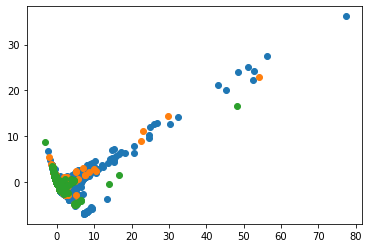

In [154]:
#plot the first 2 PCs against each other 
plt.scatter(x = pca_df.loc[1,0],y = pca_df.loc[1,1] )
plt.scatter(x = pca_df.loc[0,0],y = pca_df.loc[0,1] )
plt.scatter(x = pca_df.loc[-1,0],y = pca_df.loc[-1,1] )
plt.show()

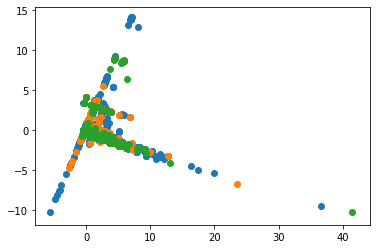

In [157]:
#plot the first 2 PCs against each other 
plt.scatter(x = pca_df.loc[1,2],y = pca_df.loc[1,3] )
plt.scatter(x = pca_df.loc[0,2],y = pca_df.loc[0,3] )
plt.scatter(x = pca_df.loc[-1,2],y = pca_df.loc[-1,3] )
plt.show()